In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

In [10]:
main="/mnt/lab_data2/anusri/chrombpnet/"

#chrombpnet_uncorrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/footprints_motifs_uncorrected/motif_footprints.h5"
#tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.06.2022_tobias_with_bias_bigwig/tobias_model/footprints/corrected_footprints.h5"
##tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.08.2022_tobias_corrected_not_softmax_custom_shift/tobias_model/footprints_motifs/motif_footprints.h5"
#hint_atac1=main+"results/hint_atac/ATAC_PE/GM12878/ATAC_PE_03.06.2022_hint_atac/hint_atac_model/footprints_motifs/motif_footprints.h5"
#simple_bias1=main+"results/chrombpnet/ATAC_PE/GM12878/ATAC_PE_03.06.2022_simplebias/chrombpnet_model/footprints/corrected_footprints.h5"
#chrombpnet_corrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/footprints_motifs/motif_footprints.h5"


chrombpnet_uncorrected1=main+"results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/chrombpnet_model/footprints_motifs_uncorrected//motif_footprints.h5"
#tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.08.2022_tobias_corrected_not_softmax_custom_shift/tobias_model/footprints_motifs/motif_footprints.h5"
hint_atac1=main+"results/hint_atac/DNASE_SE/GM12878/DNASE_SE_11.28.2022_hint_atac/hint_atac_model/all_motifs_footprints/motif_footprints.h5"
simple_bias1=main+"results/chrombpnet/DNASE_SE/GM12878/DNASE_SE_03.06.2022_simplebias/chrombpnet_model/footprints_motifs_corrected//motif_footprints.h5"
chrombpnet_corrected1=main+"results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/chrombpnet_model/footprints_motifs/motif_footprints.h5"



In [11]:
import deepdish
import numpy as np

In [12]:
def normalize_marginal_footprints(input_f):
    for key in input_f:
        if key=="control":
            continue
        input_f[key][0] = input_f[key][0] * (np.log(input_f[key][1]/input_f["control"][1]))
        #input_f[key][0] = input_f[key][0]

        print(input_f[key][1], input_f["control"][1])
    return input_f

In [13]:
#uncorrected = normalize_marginal_footprints(deepdish.io.load(chrombpnet_uncorrected1))
#tobias = normalize_marginal_footprints(deepdish.io.load(tobias1))
#hint_atac = normalize_marginal_footprints(deepdish.io.load(hint_atac1))
#chrombpnet = normalize_marginal_footprints(deepdish.io.load(chrombpnet_corrected1))
#simple_bias = normalize_marginal_footprints(deepdish.io.load(simple_bias1))

uncorrected = deepdish.io.load(chrombpnet_uncorrected1)
hint_atac = deepdish.io.load(hint_atac1)
chrombpnet = deepdish.io.load(chrombpnet_corrected1)
simple_bias = deepdish.io.load(simple_bias1)


In [14]:
import matplotlib.pyplot as plt
import matplotlib

In [15]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

def make_inset(input_array, main_axes, color, scale=None):
    x1 = 0
    x2 = 100

    input_array =input_array*1000
    # select y-range for zoomed region
    y1 = -0.01
    if scale is None:
        y2 = np.ceil(max(input_array))
    else:
        y2 = scale
    

    # Make the zoom-in plot:
    #  axins = zoomed_inset_axes(axs[i-1,3], 2, loc=1) # zoom = 2
    axins = inset_axes(main_axes, loc=1, width="50%", height=0.5) # zoom = 2

    axins.plot(input_array, c=color, alpha=0.8)
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticks([80, 120])
    axins.set_yticks([0, np.round(y2,4)])

    

    #axins.tick_params(axis='both', which='minor', labelsize=8)

    plt.xticks(visible=False)
    plt.yticks(visible=True)

    #mark_inset(main_axes, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=0.1, linestyle="--")
    plt.locator_params(axis='y', nbins=2)


    plt.draw()
    
    return y2

In [16]:
uncorrected.keys()

dict_keys(['DNASE_1', 'DNASE_2', 'DNASE_3', 'GM12878_SIGNAL_metacluster_0_pattern_0', 'GM12878_SIGNAL_metacluster_0_pattern_1', 'GM12878_SIGNAL_metacluster_0_pattern_10', 'GM12878_SIGNAL_metacluster_0_pattern_11', 'GM12878_SIGNAL_metacluster_0_pattern_12', 'GM12878_SIGNAL_metacluster_0_pattern_13', 'GM12878_SIGNAL_metacluster_0_pattern_14', 'GM12878_SIGNAL_metacluster_0_pattern_15', 'GM12878_SIGNAL_metacluster_0_pattern_2', 'GM12878_SIGNAL_metacluster_0_pattern_3', 'GM12878_SIGNAL_metacluster_0_pattern_4', 'GM12878_SIGNAL_metacluster_0_pattern_5', 'GM12878_SIGNAL_metacluster_0_pattern_6', 'GM12878_SIGNAL_metacluster_0_pattern_7', 'GM12878_SIGNAL_metacluster_0_pattern_8', 'GM12878_SIGNAL_metacluster_0_pattern_9', 'K562_COUNTS_metacluster_0_pattern_0', 'control'])

In [17]:
#plt.style.available

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


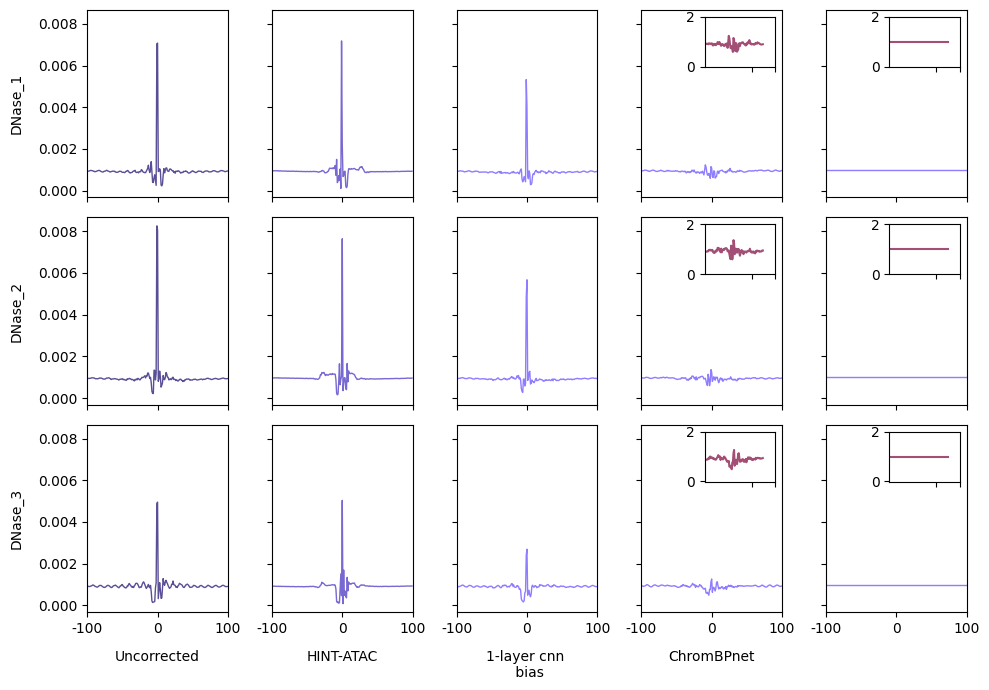

In [19]:
fig,axs = plt.subplots(3,5,figsize=(10,7),sharex=True,sharey=True)
plt.style.use('default')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

values = []
keyd="DNASE"
for i in range(1,4):
    axs[i-1,0].plot(uncorrected[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="uncorrected", c="#473C8B",linewidth=1)
    axs[i-1,1].plot(hint_atac[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="hint-atac", c="#6959CD",linewidth=1)
    axs[i-1,2].plot(simple_bias[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="chrombpnet", c="#836FFF",linewidth=1)
    axs[i-1,3].plot(chrombpnet[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="simple-bias", c="#836FFF",linewidth=1)
    axs[i-1,4].plot(np.array([0.001]*200), alpha=0.9, label="Baseline", c="#836FFF",linewidth=1)

    #y2 = make_inset(simple_bias[keyd+"_"+str(i)][0][450:550], axs[i-1,2], "#8B2252", scale=None)
    y2 = make_inset(chrombpnet[keyd+"_"+str(i)][0][450:550], axs[i-1,3], "#8B2252",scale=None)
    y3 = make_inset(np.array([0.001]*100), axs[i-1,4], "#8B2252",y2)
    #print([0.001]*100,)
    values.append([np.max(uncorrected[keyd+"_"+str(i)][0]), np.max(hint_atac[keyd+"_"+str(i)][0]), np.max(simple_bias[keyd+"_"+str(i)][0]), np.max(chrombpnet[keyd+"_"+str(i)][0]), 0.001 ])

    #axs[i,0].set_ylim([-0.01, 0.09])
    #axs[i,1].set_ylim([-0.01, 0.09])
    #axs[i,2].set_ylim([-0.01, 0.09])
    #axs[i,3].set_ylim([-0.01, 0.09])
    
    axs[i-1,0].set_xlim([0, 100])
    axs[i-1,1].set_xlim([0, 100])
    axs[i-1,2].set_xlim([0, 100])
    axs[i-1,3].set_xlim([0, 100])
    
    #axs[i,0].set_yticks([0,0.02,0.04,0.06,0.08])
    axs[i-1,0].set_xticks([0,100,200])
    axs[i-1,0].set_xticklabels([-100,0,100])

    #axs[0,i-1].tick_params(axis='both', which='minor', labelsize=15)

models = ["Uncorrected", "HINT-ATAC", "1-layer cnn \n bias", "ChromBPnet"]
motifs = ["DNase_1", "DNase_2", "DNase_3"]


for ax, col in zip(axs[:,0], motifs):
    ax.set_ylabel(col, rotation=90, labelpad=10, fontsize=10)

for ax, row in zip(axs[-1], models):
    ax.set_xlabel(row, rotation=0, labelpad=10, fontsize=10)


plt.savefig("marginal_footprints/dnase_bias_plots.pdf", transparent=True, dpi=300)
fig.tight_layout()


In [23]:
import seaborn as sns

In [24]:
#from matplotlib.colors import LogNorm

#log_norm = LogNorm(vmin=0.001, vmax=0.08)

#sns.heatmap(np.round(values,3), annot=True, cmap="PiYG" )

#plt.savefig("subfigs/marginal_footprints/tn5_response_plots_heat_map.pdf", transparent=True, dpi=300)
#fig.tight_layout()

In [106]:
values

[[0.08272136, 0.02825397, 0.014134019, 0.001944163, 0.0012233497, 0.001],
 [0.042496037, 0.045082632, 0.01108735, 0.003765558, 0.001364856, 0.001],
 [0.040253773, 0.01121114, 0.010958742, 0.0021515265, 0.0012065903, 0.001],
 [0.06445778, 0.0094436845, 0.012889935, 0.0031615957, 0.0012983093, 0.001],
 [0.052816555, 0.024388684, 0.010998838, 0.0024888196, 0.001285964, 0.001]]

In [109]:
np.round(values,3)

array([[0.083, 0.028, 0.014, 0.002, 0.001, 0.001],
       [0.042, 0.045, 0.011, 0.004, 0.001, 0.001],
       [0.04 , 0.011, 0.011, 0.002, 0.001, 0.001],
       [0.064, 0.009, 0.013, 0.003, 0.001, 0.001],
       [0.053, 0.024, 0.011, 0.002, 0.001, 0.001]])